In [230]:
import music21
import os
import numpy as np
import time
from matplotlib import pyplot as plt
from matplotlib import colors

# Musical notation software

You'll also need to download some software to view and listen to the music generated by the model.

Musescore can be freely downloaded here:

https://musescore.org/en

# Parameters

In [21]:
n_bars = 2
n_steps_per_bar = 16
n_pitches = 84
n_tracks = 4

# Viewing the data

In [182]:
file = os.path.join("/app/data/bach-chorales/Jsb16thSeparated.npz")

with np.load(file, encoding="bytes", allow_pickle=True) as f:
    data = f["train"]

print(f"{len(data)} chorales in the dataset")
MAX_PITCH = int(max([x.max() for x in data]))
print(f"Max pitch = {max_pitch}")
chorale = data[0]
n_beats, n_tracks = chorale.shape
print(f"{n_beats, n_tracks} shape of chorale 0")
print("\nChorale 0")
print(chorale[:8])

229 chorales in the dataset
Max pitch = 81
(192, 4) shape of chorale 0

Chorale 0
[[74. 70. 65. 58.]
 [74. 70. 65. 58.]
 [74. 70. 65. 58.]
 [74. 70. 65. 58.]
 [75. 70. 58. 55.]
 [75. 70. 58. 55.]
 [75. 70. 60. 55.]
 [75. 70. 60. 55.]]


In [ ]:
def numpy_to_grid(data):
    n_steps, n_tracks = data.shape
    grid = np.zeros((n_steps, n_tracks, MAX_PITCH + 1))
    for beat, step in enumerate(data):
        for track, pitch in enumerate(step):
            voice = track + 1
            grid[beat, track, int(pitch)] = voice
    return grid

In [ ]:
cmap = colors.ListedColormap(["white", "red", "orange", "green", "blue"])


def plot_grid(grid, max_steps=len(grid), min_pitch=0):
    collapsed_grid = grid.sum(axis=1)
    fig, ax = plt.subplots(1, 1)
    plt.imshow(np.transpose(collapsed_grid[:max_steps, min_pitch:]), cmap=cmap, origin="lower")
    ax.set_yticks(list(np.arange(0, MAX_PITCH - min_pitch + 1, 5)))
    ax.set_yticklabels(list(np.arange(min_pitch, MAX_PITCH + 1, 5)))
    plt.plot()

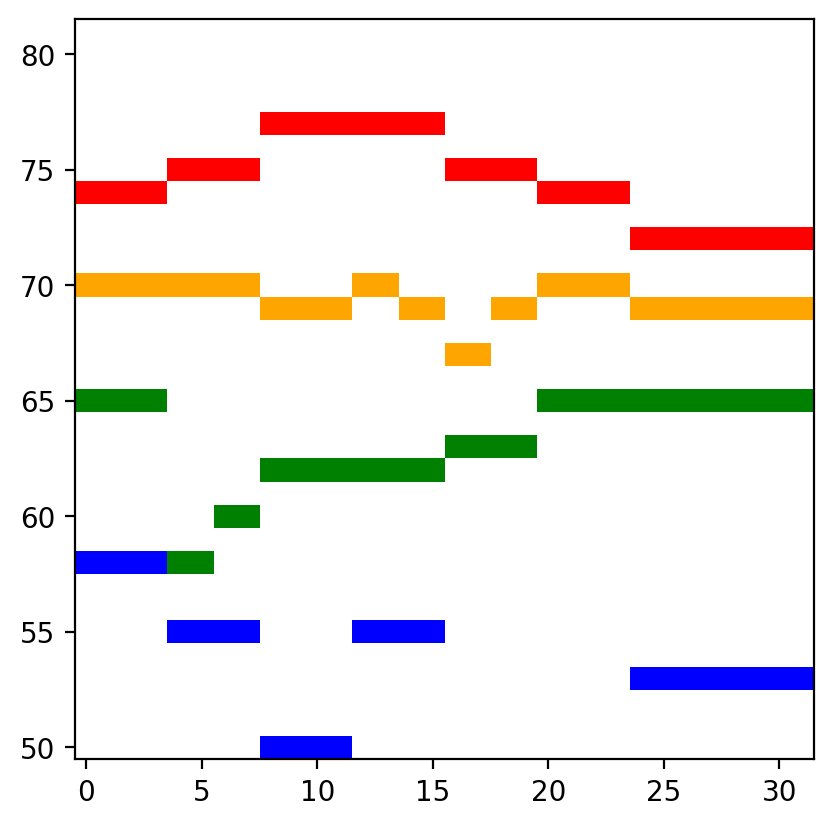

In [ ]:
grid = numpy_to_grid(chorale)
plot_grid(grid, max_steps=32, min_pitch=50)

In [270]:
def numpy_to_tokens(data):
    return chorale.flatten()

In [283]:
np.set_printoptions(linewidth=65)
tokens = numpy_to_tokens(grid)
print(tokens[:128])

[74. 70. 65. 58. 74. 70. 65. 58. 74. 70. 65. 58. 74. 70. 65. 58.
 75. 70. 58. 55. 75. 70. 58. 55. 75. 70. 60. 55. 75. 70. 60. 55.
 77. 69. 62. 50. 77. 69. 62. 50. 77. 69. 62. 50. 77. 69. 62. 50.
 77. 70. 62. 55. 77. 70. 62. 55. 77. 69. 62. 55. 77. 69. 62. 55.
 75. 67. 63. 48. 75. 67. 63. 48. 75. 69. 63. 48. 75. 69. 63. 48.
 74. 70. 65. 46. 74. 70. 65. 46. 74. 70. 65. 46. 74. 70. 65. 46.
 72. 69. 65. 53. 72. 69. 65. 53. 72. 69. 65. 53. 72. 69. 65. 53.
 72. 69. 65. 53. 72. 69. 65. 53. 72. 69. 65. 53. 72. 69. 65. 53.]


In [265]:
def numpy_to_score(data):
    score = music21.stream.Score()
    score.append(music21.tempo.MetronomeMark(number=66))
    for track, pitches in enumerate(data.T):
        part = music21.stream.Part()
        duration = 0
        current_pitch = pitches[0]
        count = 0
        for pitch in pitches:
            if pitch != current_pitch or (count % 8 == 0 and count != 0):
                part.append(music21.note.Note(pitch=current_pitch, duration=music21.duration.Duration(duration)))
                duration = 0
                current_pitch = pitch
            duration += 0.25
            count += 1
        part.append(music21.note.Note(pitch=current_pitch, duration=music21.duration.Duration(duration)))
        score.append(part)
    return score

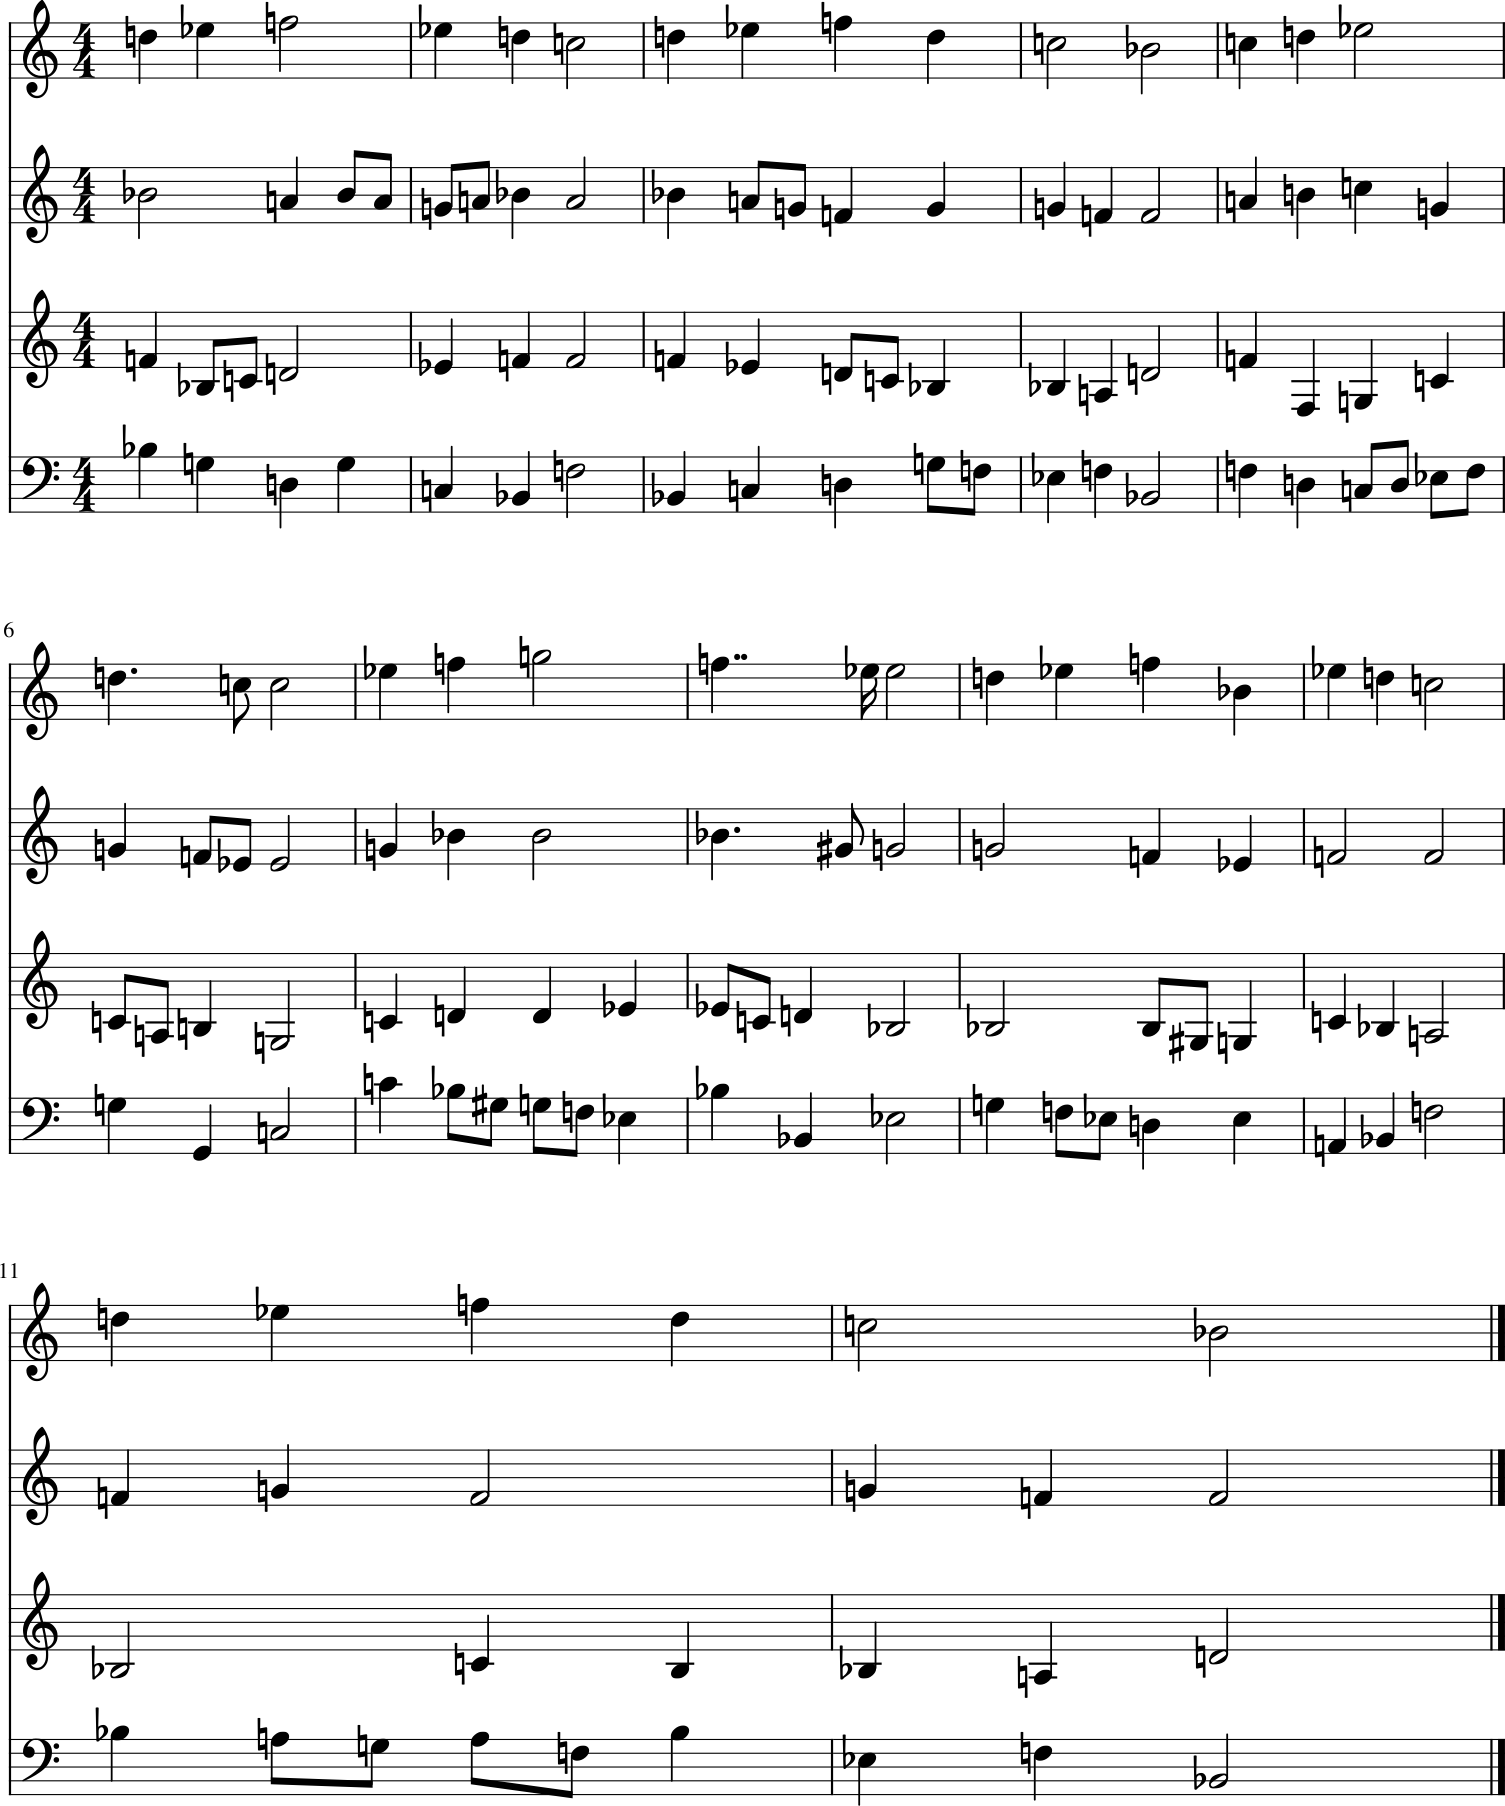

In [266]:
score = numpy_to_score(chorale)
score.show()

In [267]:
timestr = time.strftime("%Y%m%d-%H%M%S")
score.write("midi", fp=os.path.join("/app/notebooks/music/bach-chorales/output", "output-" + timestr + ".mid"))

'/app/notebooks/music/bach-chorales/output/output-20221106-171024.mid'